In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from wordcloud import WordCloud

In [110]:
df = pd.read_csv('data-1.csv')

In [111]:
df.shape

(18207, 89)

In [112]:
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [113]:
df.describe(include="object")

,Name,Photo,Nationality,Flag,Club,Club Logo,Value,Wage,Preferred Foot,Work Rate,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Release Clause
count,18207,18207,18207,18207,17966,18207,18207,18207,18159,18159,...,16122,16122,16122,16122,16122,16122,16122,16122,16122,16643
unique,17194,18207,164,164,651,679,217,144,2,9,...,99,99,99,95,98,108,108,108,98,1244
top,J. Rodríguez,https://cdn.sofifa.org/players/4/19/158023.png,England,https://cdn.sofifa.org/flags/14.png,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€1.1M,€1K,Right,Medium/ Medium,...,62+2,62+2,62+2,61+2,61+2,63+2,63+2,63+2,61+2,€1.1M
freq,11,1,1662,1662,33,33,431,4900,13948,9810,...,660,660,660,713,669,634,634,634,669,557


In [114]:
df.dtypes

Unnamed: 0          int64
ID                  int64
Name               object
Age                 int64
Photo              object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 89, dtype: object

In [115]:
df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

Text(0.5, 1.0, 'Checking Missing Values Heat Map for first half of the data')

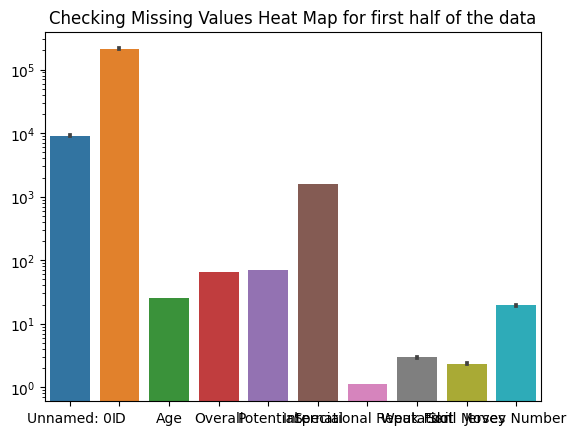

In [116]:
selected_data = df.iloc[:, :40]
sns.barplot(data=selected_data)
plt.yscale('log')
plt.title('Checking Missing Values Heat Map for first half of the data')

Text(0.5, 1.0, 'Checking Missing Values Heat Map for second half of the data')

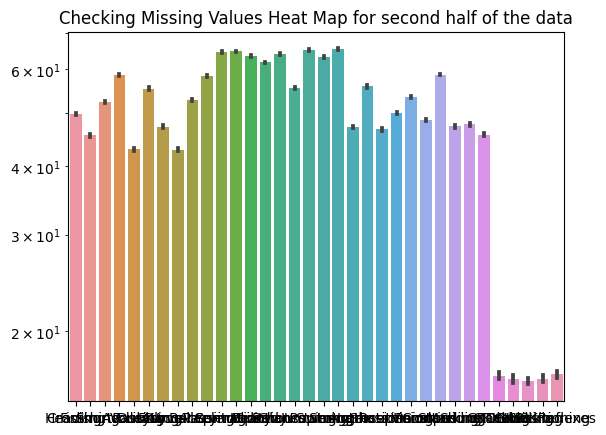

In [117]:
selected_data = df.iloc[:,40 :]
sns.barplot(data=selected_data)
plt.yscale('log')
plt.title('Checking Missing Values Heat Map for second half of the data')

Text(0.5, 1.0, 'Correlation Heatmap of Selected Attributes')

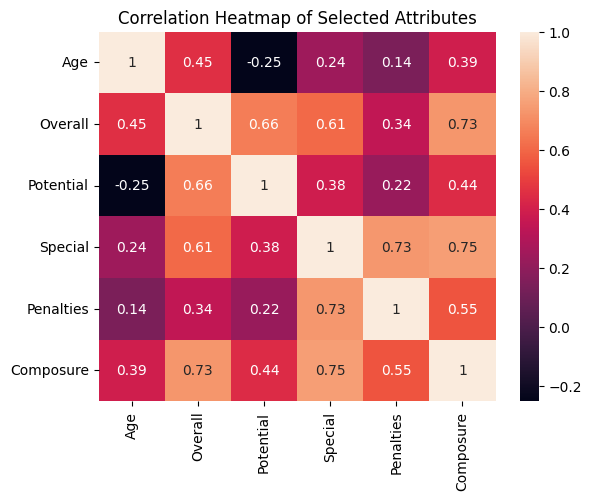

In [120]:
selected_attributes = ['Age', 'Overall', 'Potential', 'Special', 'Penalties', 'Composure']

correlation_matrix = df[selected_attributes].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap of Selected Attributes')



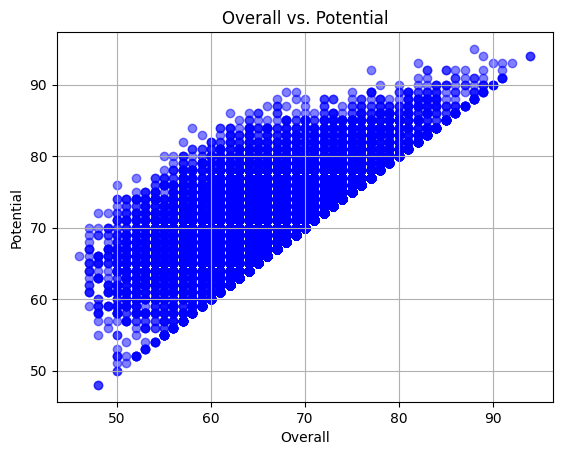

In [131]:
plt.scatter(df['Overall'], df['Potential'], color='blue', alpha=0.5)
plt.xlabel('Overall')
plt.ylabel('Potential')
plt.title('Overall vs. Potential')
plt.grid()

Text(0.5, 1.0, 'Box Plot of Special Attribute')

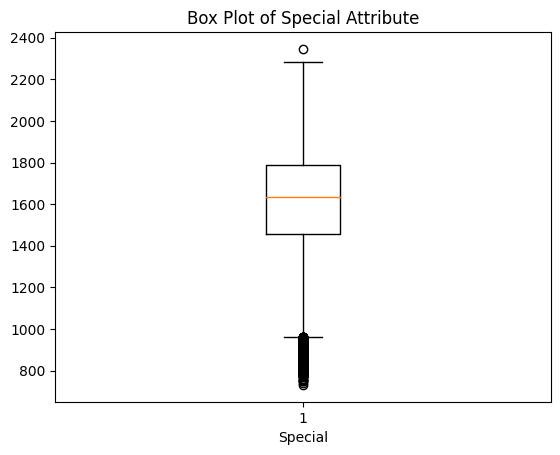

In [136]:
plt.boxplot(df['Special'])
plt.xlabel('Special')
plt.title('Box Plot of Special Attribute')

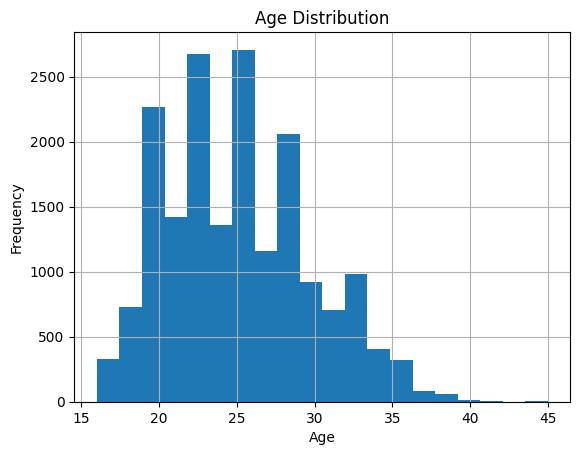

In [134]:
plt.hist(df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid()

Text(0.5, 1.0, 'Most Preferred Foot of the Players')

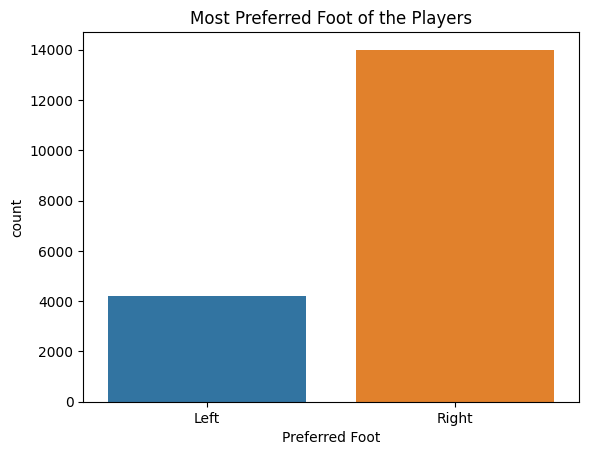

In [128]:
df['Preferred Foot'] = df['Preferred Foot'].astype('category')
sns.countplot(x='Preferred Foot', data=df)
plt.title('Most Preferred Foot of the Players')

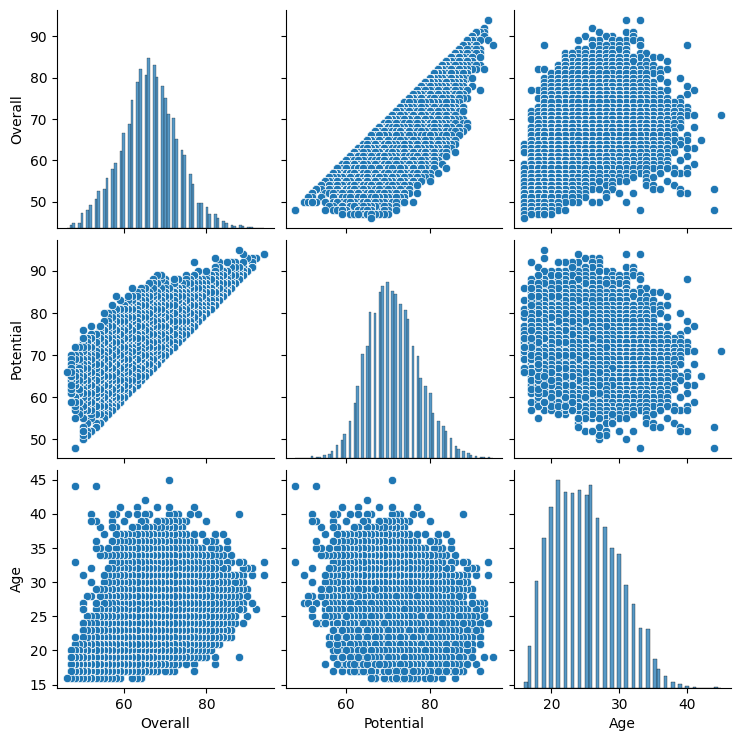

In [138]:
sns.pairplot(df[['Overall', 'Potential', 'Age', 'Value', 'Wage']])

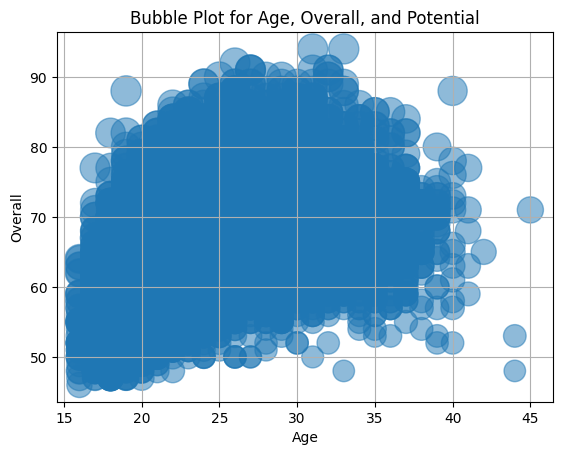

In [141]:
plt.scatter(df['Age'], df['Overall'], s=df['Potential'] * 5, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Overall')
plt.title('Bubble Plot for Age, Overall, and Potential')
plt.grid()

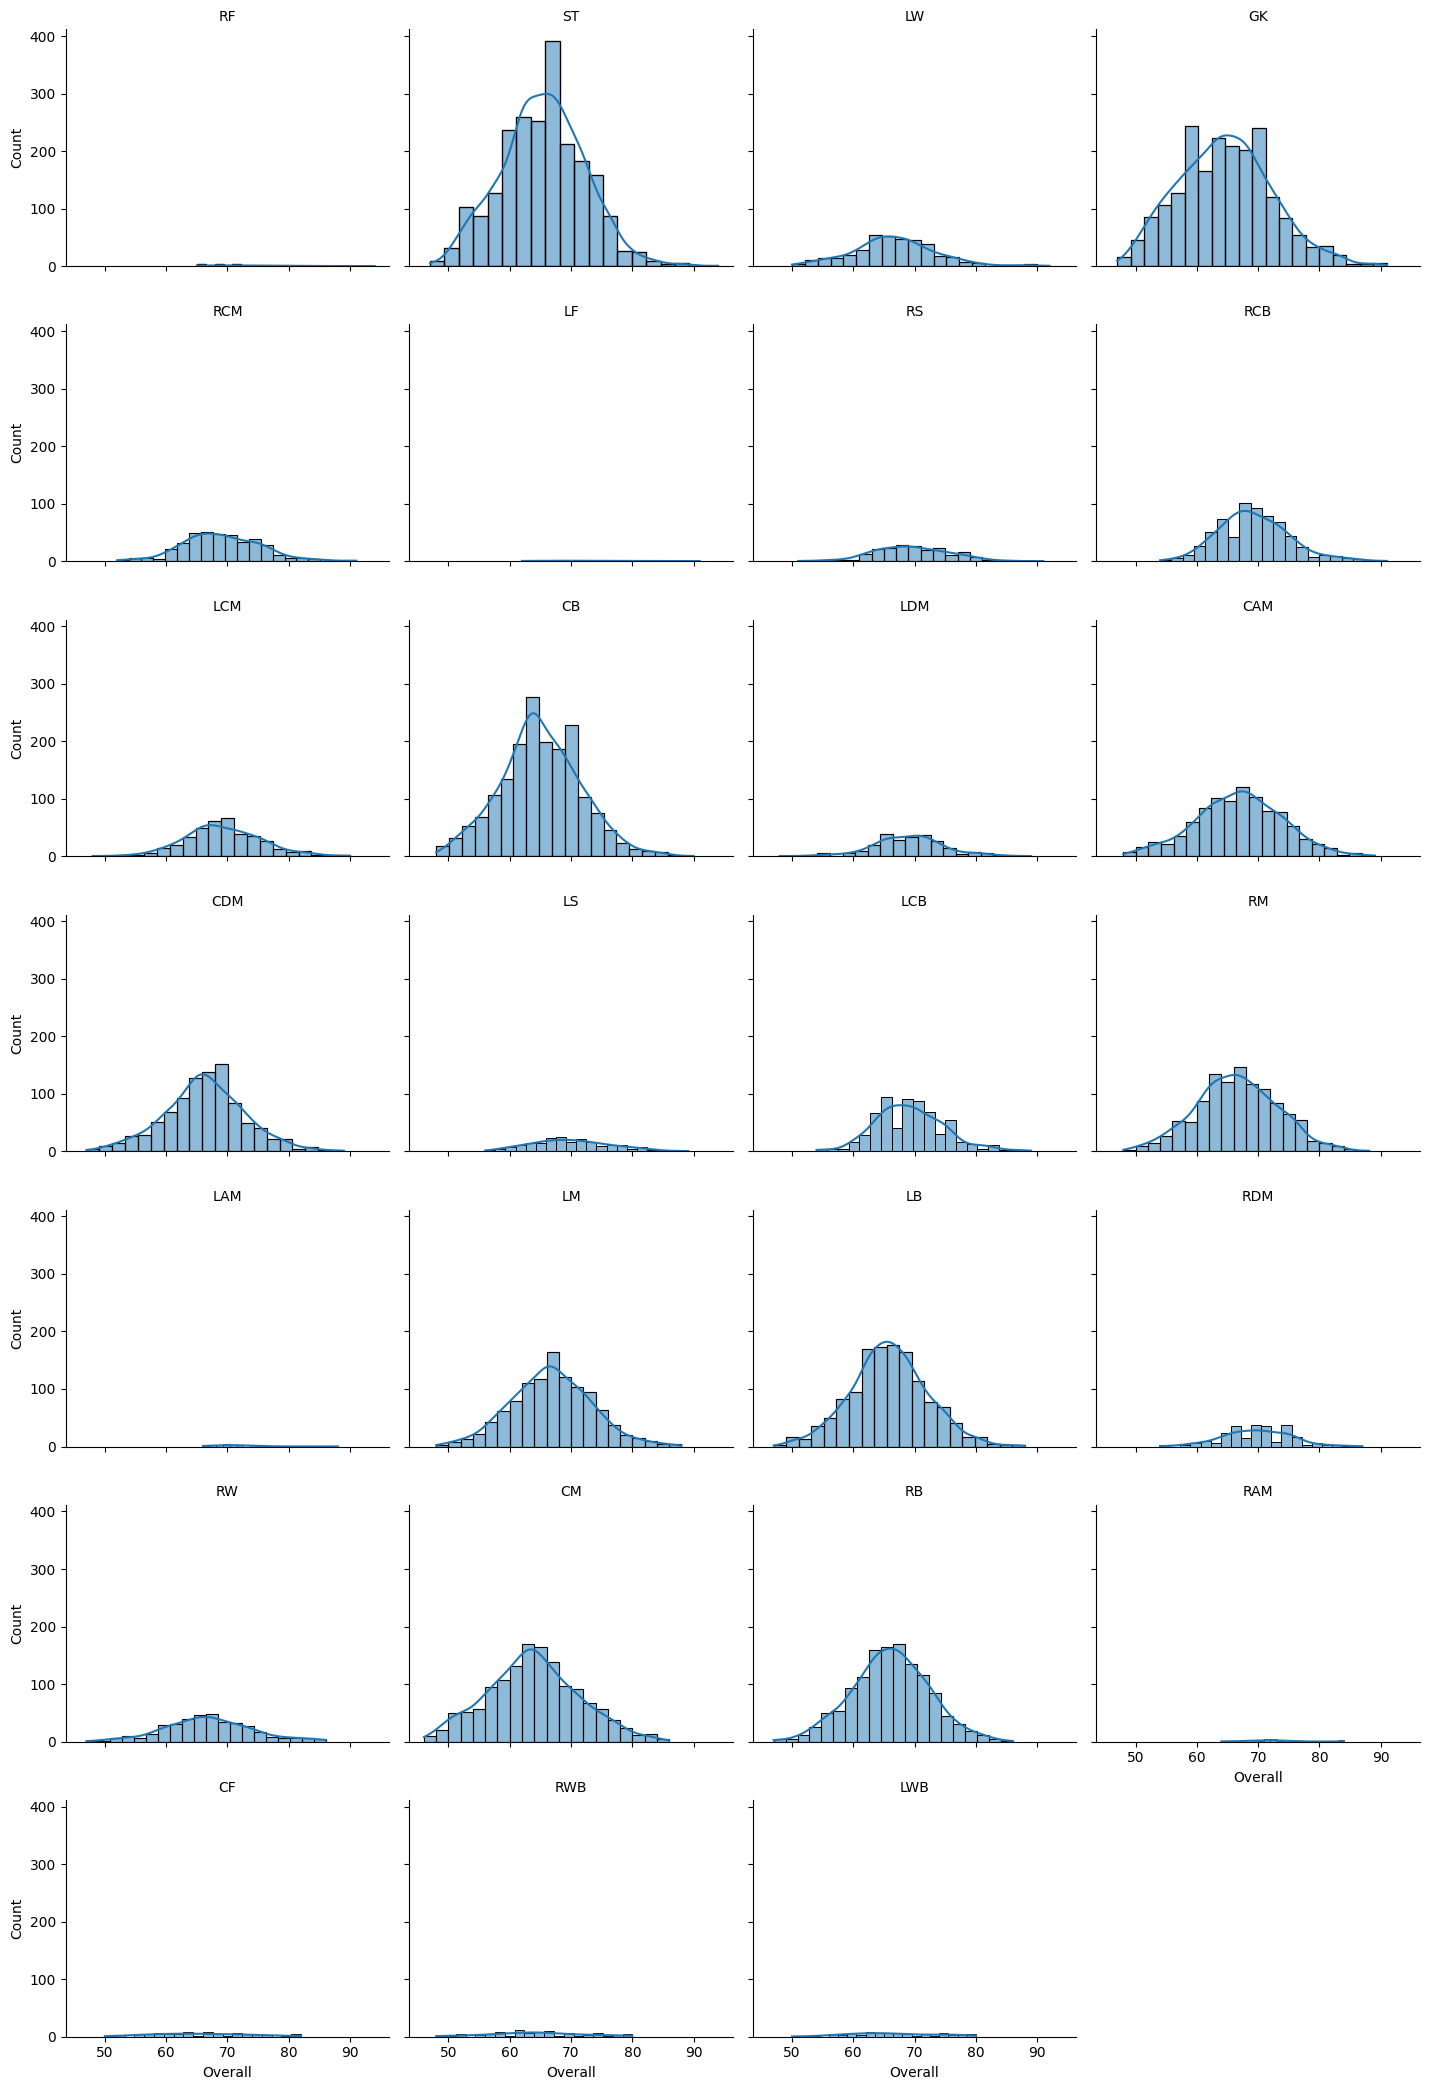

In [139]:
g = sns.FacetGrid(df, col='Position', col_wrap=4, height=3, aspect=1.2)
g.map(sns.histplot, 'Overall', bins=20, kde=True)
g.set_titles('{col_name}')

Text(0.5, 1.0, 'Word Cloud for Player Names')

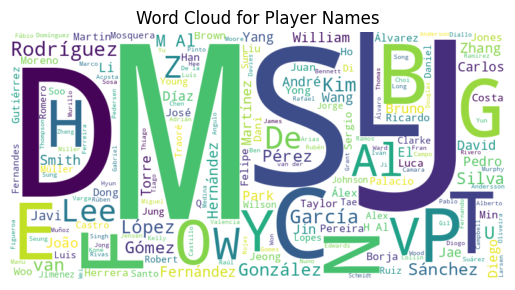

In [149]:
name_cloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Name']))
plt.imshow(name_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Player Names')


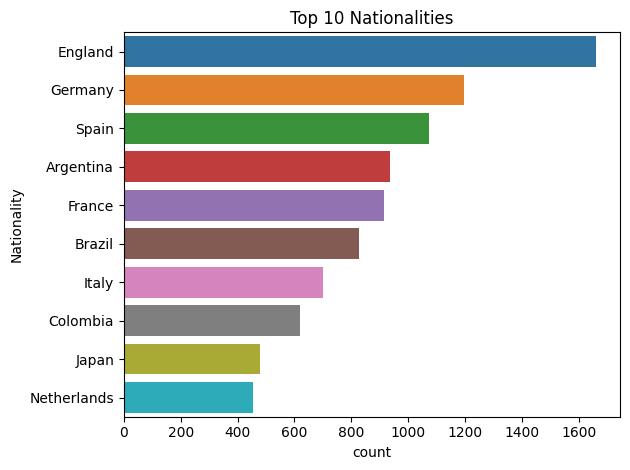

In [156]:
sns.countplot(y='Nationality', data=df, order=df['Nationality'].value_counts().iloc[:10].index)
plt.title('Top 10 Nationalities')

plt.tight_layout()

Text(0.5, 1.0, 'Overall Score by Preferred Foot')

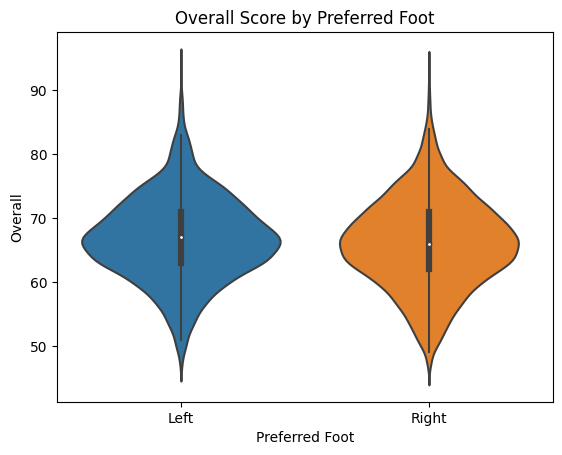

In [155]:
sns.violinplot(x='Preferred Foot', y='Overall', data=df)
plt.title('Overall Score by Preferred Foot')

Text(0.5, 1.0, 'Kernel Density Plot for Potential and Value')

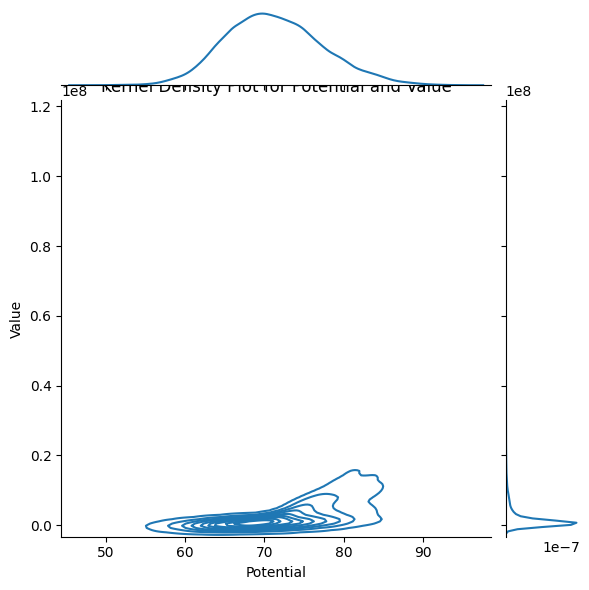

In [161]:
df['Value'] = df['Value'].str.replace('€', '').str.replace('M', 'e6').str.replace('K', 'e3').astype(float)
sns.jointplot(x='Potential', y='Value', data=df, kind='kde')
plt.title('Kernel Density Plot for Potential and Value')

Text(0.5, 0.98, 'PairGrid with Regression for Numerical Parameters')

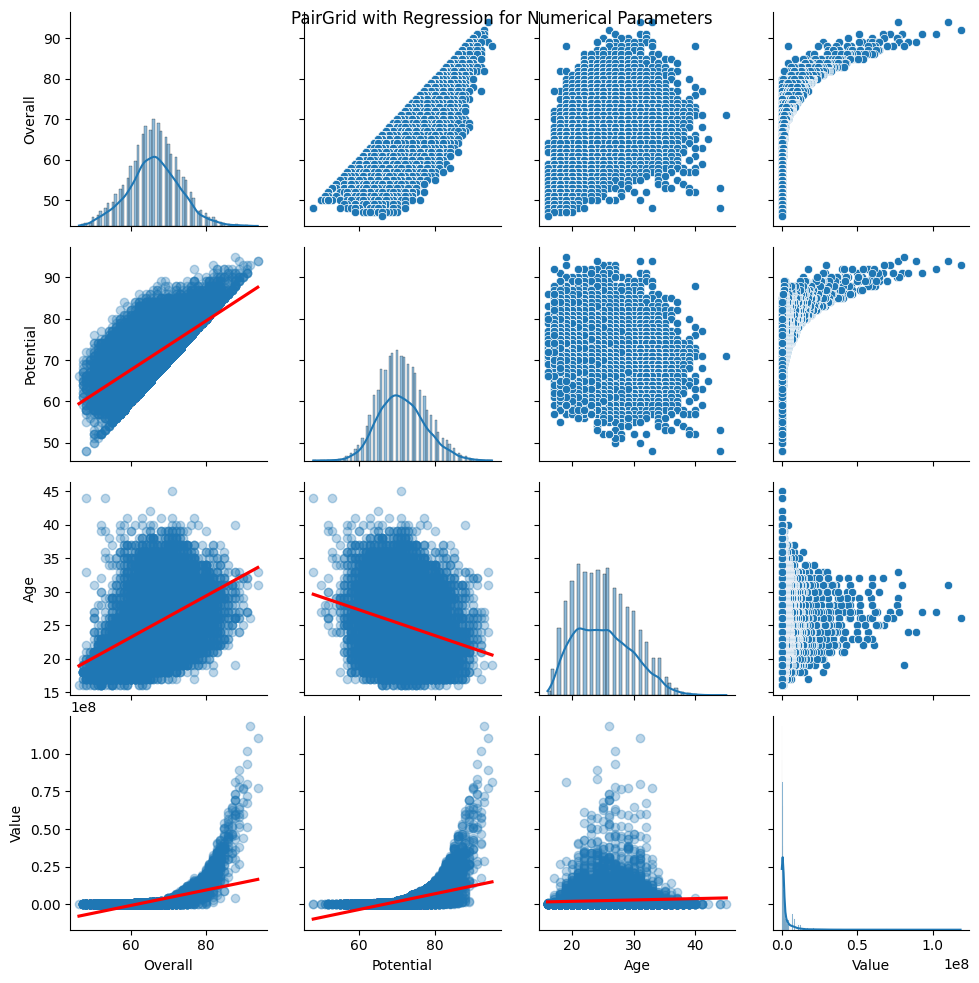

In [166]:
numerical_params = ['Overall', 'Potential', 'Age', 'Value', 'Wage']
g = sns.PairGrid(df[numerical_params])
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot, kde=True)
g.map_lower(sns.regplot, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.suptitle('PairGrid with Regression for Numerical Parameters')

<ipython-input-167-5b0d3afe61b8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[numerical_params].corr()


Text(0.5, 1.0, 'Clustermap for Numerical Parameters')

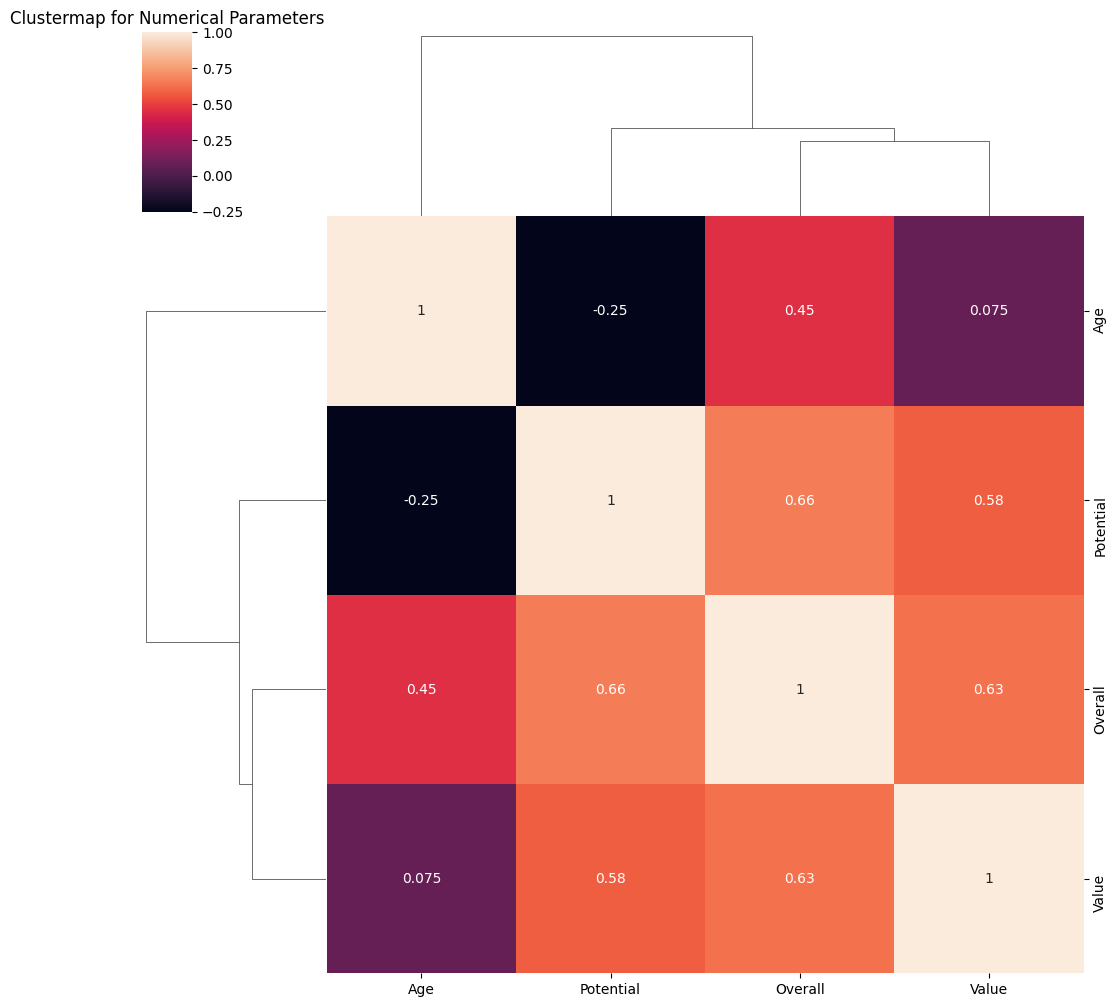

In [167]:
correlation_matrix = df[numerical_params].corr()
sns.clustermap(correlation_matrix, annot=True)
plt.title('Clustermap for Numerical Parameters')

<ipython-input-174-2877b6026121>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_std = (df[numerical_cols] - df[numerical_cols].mean()) / df[numerical_cols].std()
<ipython-input-174-2877b6026121>:9: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_std = (df[numerical_cols] - df[numerical_cols].mean()) / df[numerical_cols].std()


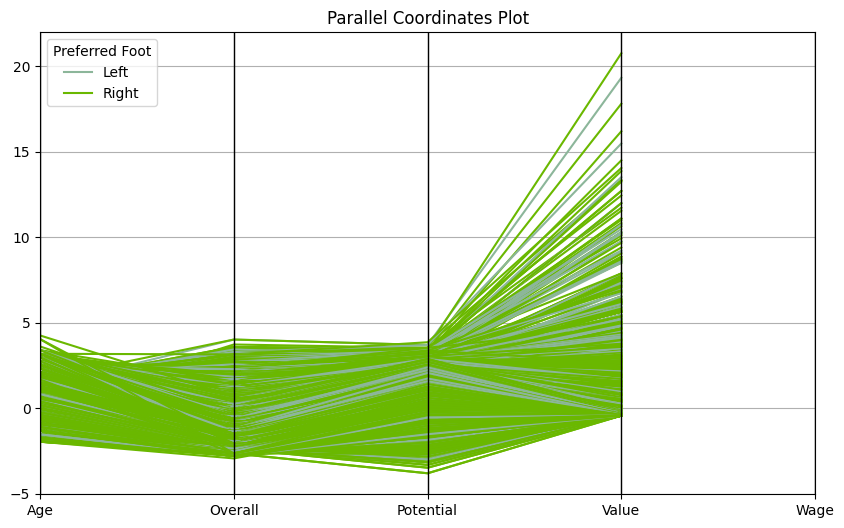

In [174]:
from pandas.plotting import parallel_coordinates
numerical_cols = ['Overall', 'Potential', 'Age', 'Value', 'Wage']
data_std = (df[numerical_cols] - df[numerical_cols].mean()) / df[numerical_cols].std()
data_std['Preferred Foot'] = df['Preferred Foot']

plt.figure(figsize=(10, 6))
parallel_coordinates(data_std, 'Preferred Foot')
plt.title('Parallel Coordinates Plot')
plt.legend(title='Preferred Foot', loc='upper left')

Text(0.5, 1.0, 'Hexbin Plot for Overall vs. Value')

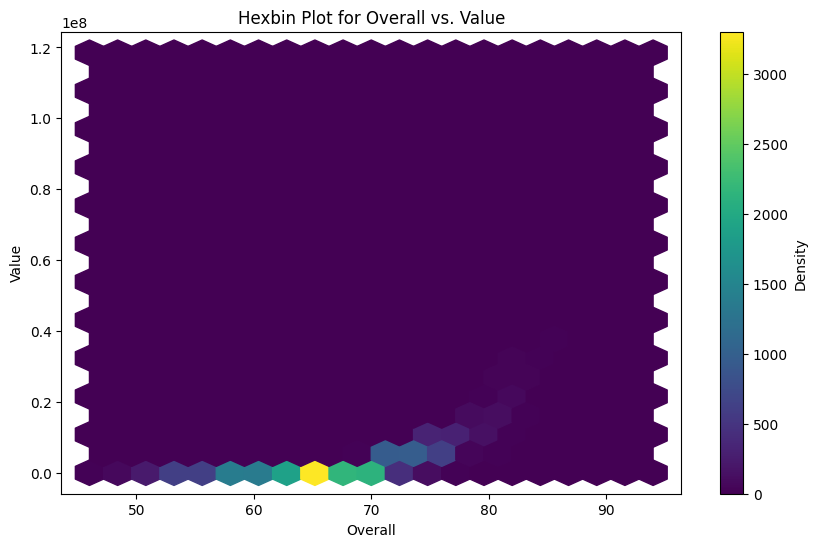

In [176]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['Overall'], df['Value'], gridsize=20)
plt.colorbar(label='Density')
plt.xlabel('Overall')
plt.ylabel('Value')
plt.title('Hexbin Plot for Overall vs. Value')